## 收集

导入数据集

In [1]:
import json
import requests
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
folder_name = 'udacity_project2'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)

In [3]:
response

<Response [200]>

In [4]:
with open(os.path.join(folder_name,
                       url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [5]:
image_predictions = pd.read_csv('udacity_project2/image-predictions.tsv',sep='\t')

In [6]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
url_2 = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/twitter-archive-enhanced.csv'
response2 = requests.get(url_2)

In [9]:
with open(os.path.join(folder_name,
                       url_2.split('/')[-1]), mode='wb') as file:
    file.write(response2.content)

In [10]:
twitter_archive_enhanced = pd.read_csv('udacity_project2/twitter-archive-enhanced.csv')

In [11]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
# 从text中提取缺少的转发和喜爱数，保留tweet_id之后和原始数据集合并
df_tweet = []
with open('udacity_project2/tweet_json.txt', encoding='utf-8') as file:
    for line in file.readlines():
        dic = json.loads(line)
        tweet_id = dic['id']
        retweet_count = dic['retweet_count']
        favorite_count = dic['favorite_count']
        text = dic['full_text']
        df_tweet.append({'tweet_id': tweet_id,
                          'retweet_count': retweet_count,
                          'favorite_count': favorite_count})


tweet = pd.DataFrame(df_tweet, columns = ['tweet_id','retweet_count','favorite_count'])

In [13]:
tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


In [14]:
tweet.tail()

,tweet_id,retweet_count,favorite_count
2347,666049248165822465,41,111
2348,666044226329800704,147,309
2349,666033412701032449,47,128
2350,666029285002620928,48,132
2351,666020888022790149,530,2528


In [15]:
tweet.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [16]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [17]:
twitter_archive_enhanced['retweeted_status_timestamp'].count()

181

In [18]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### 质量
   ##### `twitter_archive_enhanced` 表格
   
- 不包括转发数据(retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp，删除是转发的数据行)
- timestamp 错误的数据类型
- 本实验中source不具有分析意义
- 本实验中不具有分析意义，清理列（retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp
                      in_reply_to_status_id、in_reply_to_user_id、expanded_urls,expanded_urls）
- 缺少狗的名称、评分和评级（无法清理）
- name 数据有误
- rating_numerator、rating_denominator数据有误
- 评级列数据有误
- 统一评分模式，分母统一为10
- 错误的数据类型，status(地位）应该是catogary
- 需要删除无图片的推特


### 清洁度

- twitter_archive_enhanced 表格缺少喜爱和转发数两列
- twitter_archive_enhanced 表格中表示地位的四列（doggo、floofer、pupper、puppo）表示同一个变量”地位“
- 对于狗狗品种的猜测和喜爱数，转发数应该都属于twitter_archive_enhanced表格的一部分

## 清理

In [19]:
image_predictions_clean = image_predictions.copy()
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
df = tweet.copy()

### 缺失数据

#### `twitter_archive_enhanced `：缺少记录 (喜爱和转发数)

##### 代码

#### 删除列 in_reply_to_status_id、in_reply_to_user_id、source

In [20]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['in_reply_to_status_id',
                                                                      'in_reply_to_user_id','source','expanded_urls'],axis=1)

##### 测试

In [21]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,Franklin,None,None,None,None


#### 清理转发数据

##### 代码

In [22]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.isnull()]

##### 测试 确保数据集不包含转发的数据

In [23]:
twitter_archive_enhanced_clean.retweeted_status_id.count()

0

In [24]:
twitter_archive_enhanced_clean.retweeted_status_user_id.count()

0

In [25]:
twitter_archive_enhanced_clean.retweeted_status_timestamp.count()

0

In [26]:
twitter_archive_enhanced_clean.shape

(2175, 13)

#### 删除列 retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp

##### 代码

In [27]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['retweeted_status_id',
                                                                      'retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

##### 测试

In [28]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


#### `twitter_archive_enhanced` 表格四列中的一个变量 (doggo、floofer、pupper、puppo)合并成一列

##### 代码

In [29]:
twitter_archive_enhanced_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [30]:
twitter_archive_enhanced_clean = pd.melt(twitter_archive_enhanced_clean,id_vars = ['tweet_id', 'timestamp', 'text', 'rating_numerator','rating_denominator', 'name'],
             value_vars = ['doggo', 'floofer', 'pupper', 'puppo'],value_name = 'type')

In [31]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,variable,type
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,doggo,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,doggo,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,doggo,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,doggo,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,doggo,None


In [32]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['variable'],axis=1)

In [33]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,type
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None


In [34]:
twitter_archive_enhanced_clean.duplicated().sum()

6169

In [35]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop_duplicates()

In [36]:
#此时的twitter_archive_enhanced_clean包含了相同tweet_id，但是type是None或者四种地位的其中一种，有重复
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,type
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None


In [37]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.tweet_id.duplicated(keep=False)].sort_values(by=['tweet_id'])

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,type
1838,672160042234327040,2015-12-02 21:06:56 +0000,This is Bubba. He's a Titted Peebles Aorta. Ev...,8,10,Bubba,None
6188,672160042234327040,2015-12-02 21:06:56 +0000,This is Bubba. He's a Titted Peebles Aorta. Ev...,8,10,Bubba,pupper
1836,672205392827572224,2015-12-03 00:07:09 +0000,This is Opal. He's a Royal John Coctostan. Rea...,9,10,Opal,None
6186,672205392827572224,2015-12-03 00:07:09 +0000,This is Opal. He's a Royal John Coctostan. Rea...,9,10,Opal,pupper
6180,672254177670729728,2015-12-03 03:21:00 +0000,This is Rolf. He's having the time of his life...,11,10,Rolf,pupper
1830,672254177670729728,2015-12-03 03:21:00 +0000,This is Rolf. He's having the time of his life...,11,10,Rolf,None
6173,672481316919734272,2015-12-03 18:23:34 +0000,Say hello to Jazz. She should be on the cover ...,12,10,Jazz,pupper
1823,672481316919734272,2015-12-03 18:23:34 +0000,Say hello to Jazz. She should be on the cover ...,12,10,Jazz,None
6166,672594978741354496,2015-12-04 01:55:13 +0000,Meet Scott. Just trying to catch his train to ...,9,10,Scott,pupper
1816,672594978741354496,2015-12-04 01:55:13 +0000,Meet Scott. Just trying to catch his train to ...,9,10,Scott,None


In [38]:
#提取出tweet_id没有重复的值
da = twitter_archive_enhanced_clean[~(twitter_archive_enhanced_clean.tweet_id.duplicated(keep=False))]

In [39]:
#提取出type不是None的值
db = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.type!='None']

In [40]:
db.tweet_id.duplicated(keep=False).sum()

24

In [42]:
#如果相同的ID含有不同的type，将原本的type改为‘multiple’
db.loc[db.tweet_id.duplicated(keep=False),"type"] = 'multiple'
pd.options.mode.chained_assignment = None

In [43]:
db[db.tweet_id.duplicated(keep=False)]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,type
165,855851453814013952,2017-04-22 18:31:02 +0000,Here's a puppo participating in the #ScienceMa...,13,10,None,multiple
172,854010172552949760,2017-04-17 16:34:26 +0000,"At first I thought this was a shy doggo, but i...",11,10,None,multiple
382,817777686764523521,2017-01-07 16:59:28 +0000,"This is Dido. She's playing the lead role in ""...",13,10,Dido,multiple
442,808106460588765185,2016-12-12 00:29:28 +0000,Here we have Burke (pupper) and Dexter (doggo)...,12,10,None,multiple
467,802265048156610565,2016-11-25 21:37:47 +0000,"Like doggo, like pupper version 2. Both 11/10 ...",11,10,None,multiple
474,801115127852503040,2016-11-22 17:28:25 +0000,This is Bones. He's being haunted by another d...,12,10,Bones,multiple
567,785639753186217984,2016-10-11 00:34:48 +0000,This is Pinot. He's a sophisticated doggo. You...,10,10,Pinot,multiple
593,781308096455073793,2016-09-29 01:42:20 +0000,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12,10,None,multiple
722,759793422261743616,2016-07-31 16:50:42 +0000,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",12,10,Maggie,multiple
781,751583847268179968,2016-07-09 01:08:47 +0000,Please stop sending it pictures that don't eve...,5,10,None,multiple


##### 测试

In [44]:
db = db.drop_duplicates()

In [45]:
db.duplicated().sum()

0

In [46]:
twitter_archive_enhanced_clean = da.append(db)

In [47]:
twitter_archive_enhanced_clean.shape

(2175, 7)

In [48]:
twitter_archive_enhanced_clean.tweet_id.duplicated().sum()

0

In [49]:
#得出数据集包含狗狗地位，且tweet_id不重复
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,type
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None


In [50]:
#把数据集中的‘None’改为‘’
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.replace('None',np.nan)

In [51]:
twitter_archive_enhanced_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,type
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13,10,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,NaN
10,890006608113172480,2017-07-26 00:31:25 +0000,This is Koda. He is a South Australian decksha...,13,10,Koda,NaN


In [52]:
twitter_archive_enhanced_clean.type.value_counts()

pupper      224
doggo        75
puppo        24
multiple     12
floofer       9
Name: type, dtype: int64

#### 喜爱数和转发数应是 `twitter_archive_enhanced` 表格的一部分

##### 定义
将 *转发* *喜爱* 两列合并到 `twitter_archive_enhanced` 表格中，按照 *tweet_id* 进行合并。

##### 代码

In [53]:
twitter_archive_enhanced_clean = pd.merge(twitter_archive_enhanced_clean,df,
                                          on=['tweet_id'],how='inner')

##### 测试

In [54]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,type,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8842,39492
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6480,33786
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4301,25445
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8925,42863
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,9721,41016


##### 将 图片预测数据 合并到 `twitter_archive_enhanced` 表格中，按照 *tweet_id* 进行合并。
     得到只含有图片的原始评级（不包括转发）
     
##### 代码

In [55]:
twitter_archive_enhanced_clean = pd.merge(twitter_archive_enhanced_clean,image_predictions,
                                          on=['tweet_id'],how='inner')

##### 测试

In [56]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,type,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8842,39492,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6480,33786,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4301,25445,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8925,42863,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,9721,41016,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### `twitter_archive_enhanced` 表格四列中的一个变量 (doggo、floofer、pupper、puppo)直接用text中提取出来的地位信息替代

##### 代码

In [57]:
#从text中提取宠物评级
twitter_archive_enhanced_clean['status'] = 'None'
dog_lists = ['doggo','floofer','pupper','puppo']
for i in range(0,len(twitter_archive_enhanced_clean)):
    text = twitter_archive_enhanced_clean.text[i].lower()
    for dog_status in dog_lists:
        if dog_status in text:
            twitter_archive_enhanced_clean.status[i] = dog_status

##### 测试

In [58]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,type,retweet_count,favorite_count,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,status
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8842,39492,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6480,33786,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4301,25445,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8925,42863,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,9721,41016,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


In [59]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.replace('None',np.nan)

In [60]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.type != twitter_archive_enhanced_clean.status]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,type,retweet_count,favorite_count,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,status
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8842,39492,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6480,33786,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4301,25445,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8925,42863,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,9721,41016,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,NaN,NaN,3240,20548,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN,2142,12053,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13,10,NaN,NaN,19548,66596,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,NaN,4403,28187,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,NaN
9,890006608113172480,2017-07-26 00:31:25 +0000,This is Koda. He is a South Australian decksha...,13,10,Koda,NaN,7584,31127,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,...,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,NaN


In [61]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.tweet_id==855851453814013952].text

1694    Here's a puppo participating in the #ScienceMa...
Name: text, dtype: object

对比type和status有差异的数据，发现一般是doggo，floofer，pupper，puppo的延伸词，例如：pupporazzi，puppers等。决定保留这些地位信息并归于相应类别。所以用status列表示狗狗的地位，删除type列。

##### 代码

In [62]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['type'],axis=1)

##### 测试

In [63]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,status
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,8842,39492,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,6480,33786,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,4301,25445,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,8925,42863,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,9721,41016,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


#### 从text列中提取宠物评级分子和分母

##### 代码

In [64]:
#从text中获取宠物评级分子
twitter_archive_enhanced_clean['new_rating_numerator'] = twitter_archive_enhanced_clean.text.str.extract('((?:\d+\.)?\d+)/\d+',expand=True)

In [65]:
#从text中获取宠物评级分母
twitter_archive_enhanced_clean['new_rating_denominator'] = twitter_archive_enhanced_clean.text.str.extract('\d+/(\d+)',expand=True)

In [66]:
#把提取出的分子数据类型改为float
twitter_archive_enhanced_clean.new_rating_numerator = twitter_archive_enhanced_clean.new_rating_numerator.astype(float)

In [67]:
#把提取出的分母数据类型改为int
twitter_archive_enhanced_clean.new_rating_denominator = twitter_archive_enhanced_clean.new_rating_denominator.astype(int)

##### 测试

In [68]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,status,new_rating_numerator,new_rating_denominator
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,8842,39492,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,bagel,0.085851,False,banana,0.076110,False,NaN,13.0,10
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,6480,33786,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,13.0,10
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,4301,25445,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,12.0,10
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,8925,42863,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,13.0,10
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,9721,41016,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,12.0,10


查看rating_numerator、rating_denominator和new_rating_numerator、new_rating_denominator存在差异的行

In [69]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.rating_numerator!=twitter_archive_enhanced_clean.new_rating_numerator]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,status,new_rating_numerator,new_rating_denominator
34,883482846933004288,2017-07-08 00:28:19 +0000,This is Bella. She hopes her smile made you sm...,5,10,Bella,10336,46741,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,...,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,NaN,13.50,10
416,786709082849828864,2016-10-13 23:23:56 +0000,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,7033,20221,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,...,True,Persian_cat,0.122978,False,chow,0.102654,True,NaN,9.75,10
1124,680494726643068929,2015-12-25 21:06:00 +0000,Here we have uncovered an entire battalion of ...,26,10,NaN,542,1868,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,...,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,pupper,11.26,10
1799,778027034220126208,2016-09-20 00:24:34 +0000,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,1867,7292,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,...,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,pupper,11.27,10


In [70]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.rating_denominator!=twitter_archive_enhanced_clean.new_rating_denominator]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,status,new_rating_numerator,new_rating_denominator


通过查看text知道，rating_numerator取值有错误是因为分子是小数的时候没有正确取值
### 删除rating_numerator、rating_denominator列

##### 代码

In [71]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['rating_numerator','rating_denominator'],axis=1)

##### 测试

In [72]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,text,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,status,new_rating_numerator,new_rating_denominator
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,8842,39492,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,13.0,10
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,6480,33786,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,13.0,10
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,Archie,4301,25445,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,12.0,10
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,Darla,8925,42863,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,13.0,10
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,Franklin,9721,41016,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,12.0,10


### 从text列中提取宠物名字

##### 代码

In [73]:
#从text中提取宠物名字
twitter_archive_enhanced_clean['dog_name'] = twitter_archive_enhanced_clean.text.str.extract('(?:This is|Here is|Meet|name is|Say hello to|named) ([A-Z][a-z]+)',expand=True)

##### 测试

In [74]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,text,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,status,new_rating_numerator,new_rating_denominator,dog_name
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,8842,39492,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,...,bagel,0.085851,False,banana,0.076110,False,NaN,13.0,10,Phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,6480,33786,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,...,Pekinese,0.090647,True,papillon,0.068957,True,NaN,13.0,10,Tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,Archie,4301,25445,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,...,malamute,0.078253,True,kelpie,0.031379,True,NaN,12.0,10,Archie
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,Darla,8925,42863,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,13.0,10,Darla
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,Franklin,9721,41016,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,12.0,10,Franklin


In [75]:
#查看name列和dog_name列不同的数据
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.name != twitter_archive_enhanced_clean.dog_name].sample(20)

,tweet_id,timestamp,text,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,status,new_rating_numerator,new_rating_denominator,dog_name
798,710658690886586372,2016-03-18 02:46:49 +0000,Here's a brigade of puppers. All look very pre...,NaN,633,2513,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,soft-coated_wheaten_terrier,0.948617,...,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,pupper,80.0,80,NaN
1988,756275833623502848,2016-07-21 23:53:04 +0000,When ur older siblings get to play in the deep...,NaN,1733,7090,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,1,Airedale,0.602957,...,Irish_terrier,0.086981,True,bloodhound,0.086276,True,puppo,10.0,10,NaN
1835,717790033953034240,2016-04-06 19:04:14 +0000,Here's a badass mystery pupper. You weren't aw...,NaN,1263,3155,https://pbs.twimg.com/media/CfYaOeMWQAAGfyP.jpg,1,car_mirror,0.819106,...,minibus,0.107383,False,cab,0.034846,False,pupper,10.0,10,NaN
1004,689977555533848577,2016-01-21 01:07:23 +0000,Happy Wednesday here's a pup wearing a beret. ...,NaN,499,1487,https://pbs.twimg.com/media/CZNK7NpWwAEAqUh.jpg,1,cowboy_hat,0.291081,...,Labrador_retriever,0.179625,True,sombrero,0.121493,False,NaN,12.0,10,NaN
20,887343217045368832,2017-07-18 16:08:03 +0000,You may not have known you needed to see this ...,NaN,10713,34223,https://pbs.twimg.com/ext_tw_video_thumb/88734...,1,Mexican_hairless,0.330741,...,sea_lion,0.275645,False,Weimaraner,0.134203,True,NaN,13.0,10,NaN
1951,673956914389192708,2015-12-07 20:07:04 +0000,This is one esteemed pupper. Just graduated co...,one,1060,2080,https://pbs.twimg.com/media/CVpgPGwWoAEV7gG.jpg,1,pug,0.586161,...,Brabancon_griffon,0.082744,True,Chihuahua,0.045878,True,pupper,10.0,10,NaN
146,849776966551130114,2017-04-06 00:13:11 +0000,Seriously guys? Again? We only rate dogs. Plea...,NaN,8366,32267,https://pbs.twimg.com/media/C8sDpDWWsAE5P08.jpg,2,Chihuahua,0.292092,...,toy_terrier,0.136852,True,bonnet,0.103111,False,NaN,12.0,10,NaN
1935,676575501977128964,2015-12-15 01:32:24 +0000,This pupper is very passionate about Christmas...,NaN,1252,2794,https://pbs.twimg.com/media/CWOt07EUsAAnOYW.jpg,1,feather_boa,0.424106,...,Yorkshire_terrier,0.073144,True,Shetland_sheepdog,0.057598,True,pupper,8.0,10,NaN
934,697463031882764288,2016-02-10 16:51:59 +0000,Happy Wednesday here's a bucket of pups. 44/40...,NaN,1547,3730,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1,Labrador_retriever,0.999885,...,golden_retriever,0.000098,True,pug,0.000008,True,NaN,44.0,40,NaN
284,817120970343411712,2017-01-05 21:29:55 +0000,Name a more iconic quartet... I'll wait. 13/10...,NaN,3004,13331,https://pbs.twimg.com/media/C1b_LSYUsAAJ494.jpg,1,Saluki,0.568809,...,Afghan_hound,0.229352,True,golden_retriever,0.157130,True,NaN,13.0,10,NaN


对比看出name中确实存在很多名字提取错误，例如：a、an、the等，我们删除name列，保留从text中提取出的dog_name

In [76]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['name'],axis=1)

In [77]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.rename(columns={'dog_name':'name',
                                               'new_rating_numerator':'rating_numerator',
                                               'new_rating_denominator':'rating_denominator'})

In [78]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,text,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,status,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,8842,39492,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,13.0,10,Phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,6480,33786,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,13.0,10,Tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,4301,25445,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,12.0,10,Archie
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,8925,42863,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,13.0,10,Darla
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,9721,41016,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,12.0,10,Franklin


In [79]:
pd.set_option('max_colwidth',200)

In [80]:
#不按照正常评分分母是10来评分的数据
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.rating_denominator != 10]

,tweet_id,timestamp,text,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,status,rating_numerator,rating_denominator,name
267,820690176645140481,2017-01-15 17:52:40 +0000,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,3699,13476,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True,NaN,84.0,70,NaN
317,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,1647,5904,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,NaN,24.0,7,Sam
553,758467244762497024,2016-07-28 01:00:57 +0000,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,2516,5297,https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,NaN,165.0,150,NaN
658,740373189193256964,2016-06-08 02:41:38 +0000,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",15029,37704,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,NaN,9.0,11,NaN
695,731156023742988288,2016-05-13 16:15:54 +0000,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,1427,4172,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False,doggo,204.0,170,NaN
728,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,1754,4473,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,NaN,4.0,20,NaN
756,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,246,2562,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,NaN,50.0,50,Bluebert
776,713900603437621249,2016-03-27 01:29:02 +0000,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,827,3049,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,pupper,99.0,90,NaN
798,710658690886586372,2016-03-18 02:46:49 +0000,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,633,2513,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,pupper,80.0,80,NaN
815,709198395643068416,2016-03-14 02:04:08 +0000,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",716,2623,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,NaN,45.0,50,NaN


In [81]:
#tweet_id是810984652412424192这一行数据，24/7实际不是对狗狗的评分，所以删除
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop([317])

In [83]:
#tweet_id是722974582966214656这一行数据，有两个评分类型的格式，4/20和13/10，13/10才是评分
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id==722974582966214656,'rating_numerator']=13

In [84]:
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.tweet_id==722974582966214656,'rating_denominator']=10

In [86]:
#新增一列分子除以分母
twitter_archive_enhanced_clean['rating_score'] = twitter_archive_enhanced_clean.rating_numerator/twitter_archive_enhanced_clean.rating_denominator

In [87]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,text,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,status,rating_numerator,rating_denominator,name,rating_score
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,8842,39492,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,...,0.085851,False,banana,0.076110,False,NaN,13.0,10,Phineas,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",6480,33786,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,...,0.090647,True,papillon,0.068957,True,NaN,13.0,10,Tilly,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,4301,25445,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,...,0.078253,True,kelpie,0.031379,True,NaN,12.0,10,Archie,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,8925,42863,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,...,0.168086,True,spatula,0.040836,False,NaN,13.0,10,Darla,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",9721,41016,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,...,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,12.0,10,Franklin,1.2


#### timestamp的格式错误

##### 代码

In [88]:
twitter_archive_enhanced_clean.timestamp = pd.to_datetime(twitter_archive_enhanced_clean.timestamp)

##### 测试

In [89]:
twitter_archive_enhanced_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [90]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id              1993 non-null int64
timestamp             1993 non-null datetime64[ns]
text                  1993 non-null object
retweet_count         1993 non-null int64
favorite_count        1993 non-null int64
jpg_url               1993 non-null object
img_num               1993 non-null int64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog                1993 non-null bool
status                342 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null int64
name                  1375 non-null object
rating_score          1993 non-nu

修改status列数据类型

##### 代码

In [91]:
twitter_archive_enhanced_clean.status = twitter_archive_enhanced_clean.status.astype('category')

##### 测试

In [92]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id              1993 non-null int64
timestamp             1993 non-null datetime64[ns]
text                  1993 non-null object
retweet_count         1993 non-null int64
favorite_count        1993 non-null int64
jpg_url               1993 non-null object
img_num               1993 non-null int64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog                1993 non-null bool
status                342 non-null category
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null int64
name                  1375 non-null object
rating_score          1993 non-

将清理之后的数据集保存为twitter_archive_master.csv

In [93]:
twitter_archive_enhanced_clean.to_csv('udacity_project2/twitter_archive_master.csv', index=False)

## 分析

```
tweet_id
timestamp
text
retweet_count
favorite_count
jpg_url：是预测的图像资源链接
img_num：最可信的预测结果对应的图像编号 → 1 推特中的第一张图片
p1：是算法对推特中图片的一号预测 → 金毛犬
p1_conf：是算法的一号预测的可信度 → 95%            
p1_dog：是一号预测该图片是否属于“狗”（有可能是其他物种，比如熊、马等） → True 真
p2：是算法对推特中图片预测的第二种可能性 → 拉布拉多犬           
p2_conf：是算法的二号预测的可信度 → 1%              
p2_dog：是二号预测该图片是否属于“狗” → True 真               
p3：是算法对推特中图片预测的第三种可能性                    
p3_conf：是算法的三号预测的可信度              
p3_dog：是三号预测该图片是否属于“狗”                
status：狗狗的地位（doggo、floofer、puppet、puppo）                
rating_numerator：评级的分子      
rating_denominator：评级的分母    
name：狗狗的名字                  
rating_score：评级的分子除以分母所得的值          
```

## 数据可视化

#### 1、参与weratedog活动中什么地位的狗狗最多？

In [94]:
twitter_archive_enhanced_clean.status.value_counts()

pupper     237
doggo       68
puppo       29
floofer      8
Name: status, dtype: int64

Text(0.5,1,'The status of dogs')

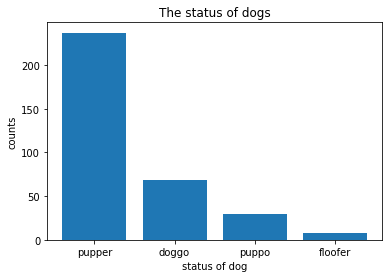

In [95]:
x = ['pupper','doggo','puppo','floofer']
y = twitter_archive_enhanced_clean.status.value_counts()

plt.bar(x,y)
plt.xlabel("status of dog")
plt.ylabel("counts")
plt.title("The status of dogs")

#### 2、不同地位的狗狗的平均评分值

In [96]:
twitter_archive_enhanced_clean.groupby('status')['rating_score'].mean()

status
doggo      1.180882
floofer    1.187500
pupper     1.062249
puppo      1.217241
Name: rating_score, dtype: float64

In [97]:
from matplotlib import pyplot 

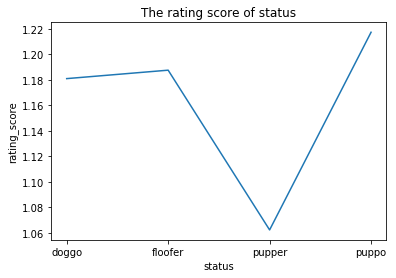

In [98]:
x = ['doggo','floofer','pupper','puppo']
y = twitter_archive_enhanced_clean.groupby('status')['rating_score'].mean()

pyplot.plot(x,y)
pyplot.xlabel('status')
pyplot.ylabel('rating_score')
pyplot.title('The rating score of status')

pyplot.show()

评分对应的转发数量和喜爱数量

#### 3、是否评分越高，喜爱和转发数量越高？

In [99]:
twitter_archive_enhanced_clean.rating_score.value_counts()

1.200000      454
1.000000      421
1.100000      402
1.300000      262
0.900000      151
0.800000       95
0.700000       51
1.400000       35
0.500000       33
0.600000       32
0.300000       19
0.400000       15
0.200000        9
0.100000        4
0.000000        2
1.127000        1
1.350000        1
0.636364        1
0.818182        1
1.126000        1
0.975000        1
42.000000       1
177.600000      1
Name: rating_score, dtype: int64

In [100]:
#因为部分评分计数值很小，当作特殊数据，绘制图形的的时候不包含进去
x = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4]
y1 = []
y2 = []
for a in set(x):
    b = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['rating_score']==a].retweet_count.mean()
    c = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['rating_score']==a].favorite_count.mean()
    y1.append(b)
    y2.append(c)

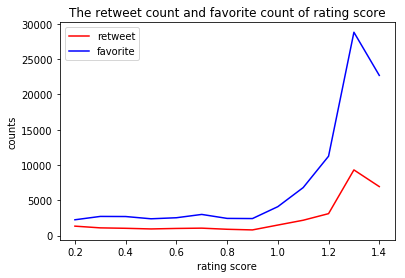

In [101]:
plt.plot(x,y1,'r',label='retweet')
plt.plot(x,y2,'b',label='favorite')

plt.title('The retweet count and favorite count of rating score')
plt.xlabel('rating score')
plt.ylabel('counts')

plt.legend()
plt.show()

### 结论

1、由可视化图表("The status of dogs")可以看出，数据集中有很多狗狗缺失地位信息，从推文中无法获取，显示为None。除了没有地位信息的狗狗之外，地位是pupper的狗狗最多，第二是doggo,第三和第四分别是puppo和floofer。
2、不同地位的狗狗评分值差异，由可视化图表('The rating score of status')看出，地位是pupper的狗狗平均评分最低，puppo地位的狗狗平均评分最高，doggo和floofer几乎一致。
3、查看评分和喜爱转发之间是否一定的关联度，由可视化图表('The retweet count and favorite count of rating score')看出，转发数量和喜爱数量，从评分0.2～1.3区间，有个明显的上升趋势。在本数据集中可以认为评分和转发、喜爱数量之间有一定的正相关，但是分析有一定的局限性，因为数据量不够大，可能对数据结果造成了一定影响。